In [9]:
# 필요 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [36]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
print("완료!")

완료!


In [11]:
# 필요 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [12]:
# 데이터 호출하기
entry_data = pd.read_csv('/aiffel/aiffel/workplace/Data_Analysis_ABC/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/aiffel/workplace/Data_Analysis_ABC/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/aiffel/workplace/Data_Analysis_ABC/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/aiffel/workplace/Data_Analysis_ABC/data/item_entry_data.csv')

In [13]:
#고객들의 입퇴실에 대한 데이터
entry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


In [14]:
#고객들의 상품 구매에 대한 데이터
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   object
 7   고객      6300 non-null   object
dtypes: int64(1), object(7)
memory usage: 444.2+ KB


In [15]:
item_data

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"
...,...,...,...,...
169,170,커피,카페모카(ICE),"2,500원"
170,171,커피,헤이즐넛라떼(ICE),"2,500원"
171,172,포장,오늘은 순살닭다리 덮밥,"9,000원"
172,173,포장,오늘은 한돈간장불고기,"8,000원"


In [16]:
item_entry_data

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"
5,6,한국대생,한국대생 요금제,"1,500원"
6,7,18시이후,거리두기4단계,"1,000원"
7,8,심야-조조,심야-조조 요금제,"2,500원"
8,9,일반인,일반요금제,"3,000원"
9,10,일반인,일반요금제,"7,000원"


In [17]:
#전처리 -> entry_data와 item_entry_data
unique_data_e=entry_data['요금제명'].unique()
unique_data_ie=item_entry_data['상품명'].unique()
print(unique_data_e)
print(unique_data_ie)

['시간요금제(1시간)' '무제한 입장권' '한국대생 무제한 입장권' '기간권' '시간요금제(3시간)' '심야-조조무제한' '시간권'
 nan '입장권(종일권)' '한국대생 입장권(종일권)' '1시간' '조조무제한' '18시이후 무제한' '3시간'
 '심야-조조무제한(06시까지)' '이용권' '시간 요금제(1시간당)' '시간요금제(1시간당)' '무제한(한국대생)'
 '1시간 요금제' '무제한(일반요금)' '종일요금제' '시간요금제']
['한국대생 요금제' '심야-조조 요금제' '일반요금제' '거리두기4단계' '마감요금' '기본요금제' '추석당일 요금제']


In [18]:
#요금제, 상품 비교.. 실패!
for i in unique_data_e:
  sorted_entry_data=entry_data[entry_data['요금제명']== i ]
  uniqueval=sorted_entry_data['금액'].unique()
  print(i)
  print(uniqueval)

시간요금제(1시간)
[3000 2500]
무제한 입장권
[7400 8400 8900 6900 7900 8600 7500]
한국대생 무제한 입장권
[7400 6400 6900 8400 7900 8100]
기간권
[0]
시간요금제(3시간)
[8000 7000]
심야-조조무제한
[6000 5000]
시간권
[0]
nan
[]
입장권(종일권)
[7000 6500 7500 6000 8000 5500]
한국대생 입장권(종일권)
[6000 5500 6500 7500 7000 5000]
1시간
[2500]
조조무제한
[5000 4000]
18시이후 무제한
[5000 4500 6500 5500 6000]
3시간
[7000]
심야-조조무제한(06시까지)
[5000]
이용권
[0]
시간 요금제(1시간당)
[2500]
시간요금제(1시간당)
[2500]
무제한(한국대생)
[7000]
1시간 요금제
[2000]
무제한(일반요금)
[6000]
종일요금제
[6000 7000 6500 7500]
시간요금제
[5900 6400]


In [19]:
#
sorted_entry_data=entry_data[entry_data['요금제명']=='시간요금제(1시간)']
print(sorted_entry_data)
uniqueval=sorted_entry_data['금액'].unique()
print(uniqueval)

             요금제명                입실                퇴실           이용    위치  \
0      시간요금제(1시간)  2022-04-01 23:39   2022-04-02 0:39   오전 1:00:00  선불기2   
1      시간요금제(1시간)  2022-04-01 23:39   2022-04-02 0:39   오전 1:00:00  선불기2   
19     시간요금제(1시간)  2022-04-01 16:26  2022-04-01 16:55  오전 12:29:00  선불기2   
66     시간요금제(1시간)  2022-03-31 16:13  2022-03-31 17:26   오전 1:12:00  선불기2   
67     시간요금제(1시간)  2022-03-31 16:13  2022-03-31 17:26   오전 1:12:00  선불기2   
...           ...               ...               ...          ...   ...   
22047  시간요금제(1시간)  2021-03-10 17:45  2021-03-10 19:18   오전 1:32:00  선불기2   
22048  시간요금제(1시간)  2021-03-10 17:45  2021-03-10 19:18   오전 1:32:00  선불기2   
22105  시간요금제(1시간)  2021-03-09 17:18  2021-03-09 18:38   오전 1:19:00  선불기2   
22130  시간요금제(1시간)  2021-03-08 23:05   2021-03-09 1:34   오전 2:29:00  선불기2   
22192  시간요금제(1시간)   2021-03-08 8:59  2021-03-08 10:52   오전 1:53:00  선불기2   

         금액  구분              고객  
0      3000  퇴실  customer263717  
1      3000  퇴실  cu

In [20]:
# 문제 1: 월별 매출액 추세
# 활용할 데이터(sales_data)를 temp_var로 정의하기
# [[YOUR CODE]]
temp_var = sales_data


# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
# [[YOUR CODE]]
temp_var['date'] = sales_data['결제일시'].str[:7]
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN,2021-02


In [21]:
# sales_data의 결제금액에 포함된 쉼표(,) 지우기
# [[YOUR CODE]]

temp_var['결제금액'] = temp_var['결제금액'].replace(',','',regex = True)
# sales_data의 결제금액을 숫자형태로 바꾸기
# [[YOUR CODE]]
temp_var['결제금액'] = temp_var['결제금액'].astype(int)
# temp_var의 payment열을 date 기준으로 집계하기
# [[YOUR CODE]]
payment_data = temp_var['결제금액'].groupby(temp_var['date']).sum()
payment_data = payment_data.reset_index()


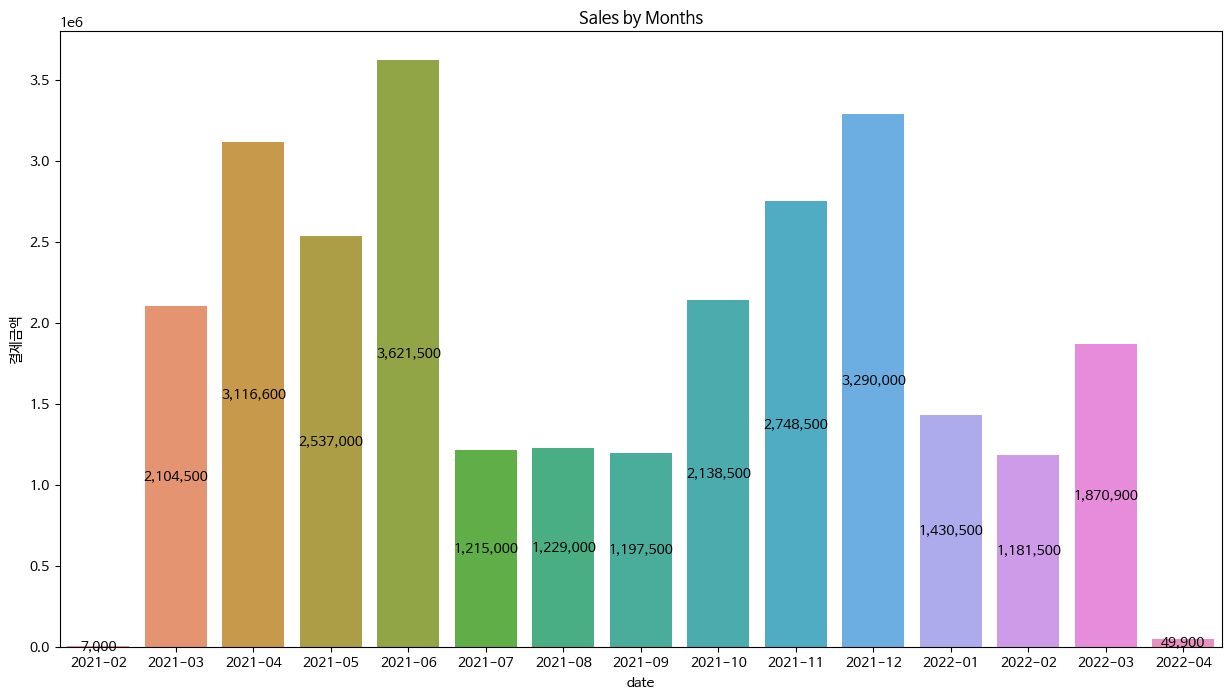

In [37]:
# 집계 결과를 시각화하기
# [[YOUR CODE]]
plt.figure(figsize = (15,8))
ax = sns.barplot(data=payment_data, x='date', y='결제금액')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Sales by Months')
plt.show()

In [23]:
# 문제 2: 가장 인기 있는 음식/음료
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
# 힌트 코드 : temp_var[temp_var['판매수량']==-1]
# [[YOUR CODE]]
temp_var_sales = temp_var[temp_var['판매수량'] != -1]
popular_items = temp_var_sales['상품명'].value_counts()

# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
# [[YOUR CODE]]
items_count=popular_items.reset_index().rename(columns={'index':'상품명','상품명':'판매수량'})
items_count.head(10)

,상품명,판매수량
0,김치볶음밥,1204
1,라면,749
2,짜장라면,455
3,치즈불고기볶음밥,420
4,계란추가,314
5,낙지볶음밥,312
6,새우볶음밥,309
7,아메리카노(ICE),284
8,치즈감자튀김,246
9,감자튀김,242


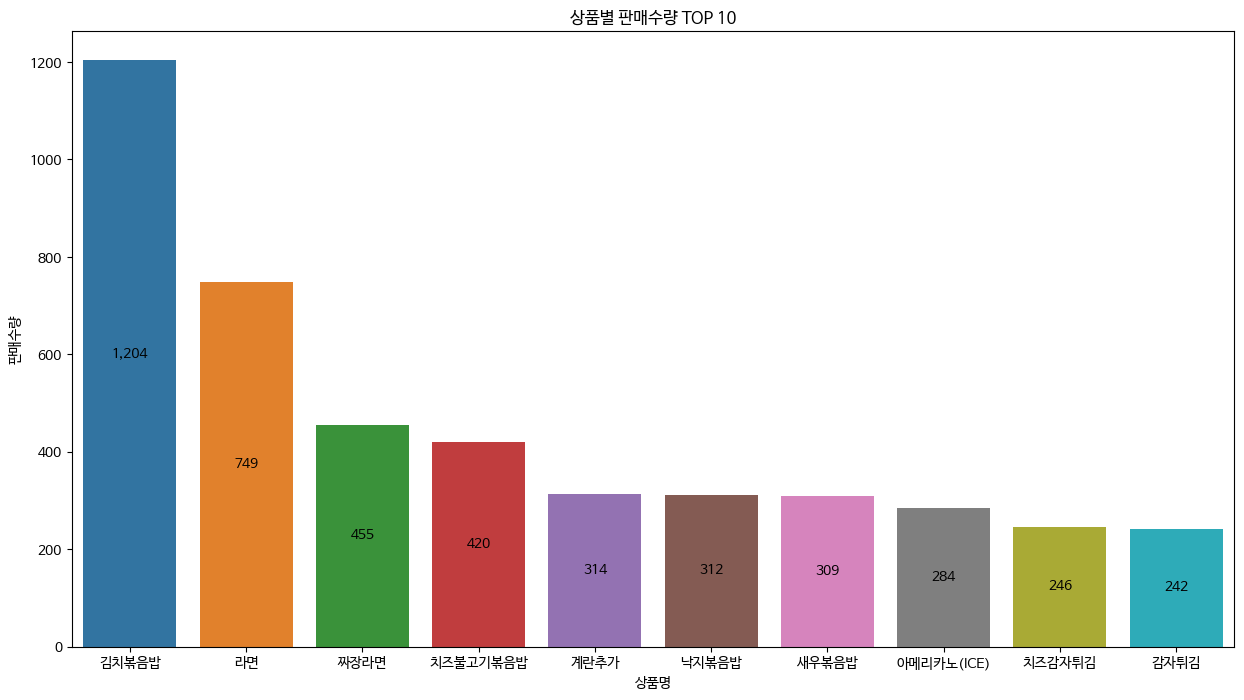

In [38]:
# 집계 결과를 시각화하기
# [[YOUR CODE]]
plt.figure(figsize = (15,8))
ax = sns.barplot(data=items_count.head(10), x='상품명', y='판매수량')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('상품별 판매수량 TOP 10')
plt.show()

In [25]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
# [[YOUR CODE]]
items_payment = temp_var_sales['결제금액'].groupby(temp_var_sales['상품명']).sum()


# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
# [[YOUR CODE]]
items_payment = items_payment.sort_values(ascending=False)
items_payment = items_payment.reset_index().rename(columns={'결제금액':'매출'})
items_payment.head(10)


,상품명,매출
0,김치볶음밥,6004400
1,라면,2941500
2,치즈불고기볶음밥,2292600
3,짜장라면,2038500
4,낙지볶음밥,1710700
5,새우볶음밥,1539800
6,치즈감자튀김,1354200
7,감자튀김,1083800
8,아메리카노(ICE),1058100
9,불닭볶음면,693000


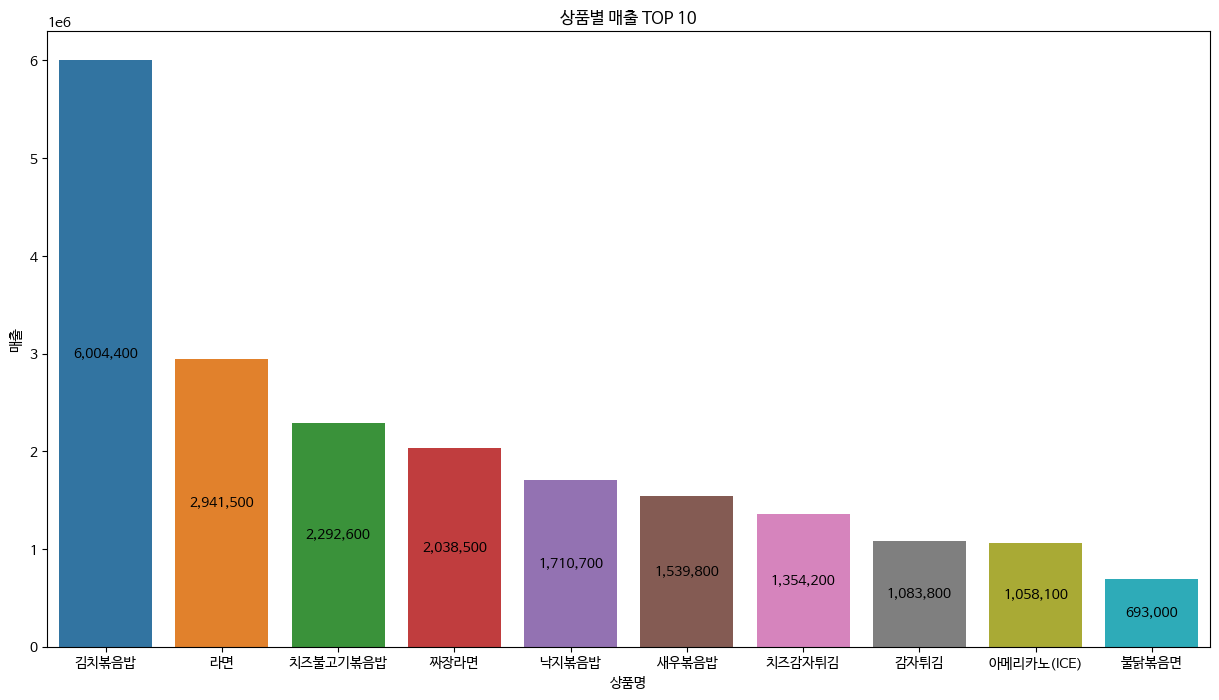

In [39]:
# 집계 결과 시각화하기
# [[YOUR CODE]]
plt.figure(figsize = (15,8))
ax = sns.barplot(data=items_payment.head(10), x='상품명', y='매출')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('상품별 매출 TOP 10')
plt.show()

In [27]:
# 문제 3: 가장 많이 팔린 입장권 종류
# 활용할 데이터(entry_data)를 temp_var로 정의하기
# [[YOUR CODE]]
temp_var = entry_data
# temp_var의 금액을 숫자형태로 변환하기
# [[YOUR CODE]]
temp_var['금액'] = temp_var['금액'].astype(int)

# temp_var의 금액을 요금제명을 기준으로 집계하기
# [[YOUR CODE]]
tickets = temp_var['금액'].groupby(temp_var['요금제명']).sum()

# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
# [[YOUR CODE]]
tickets = tickets.sort_values(ascending=False)
tickets = tickets.reset_index().rename(columns={'금액':'매출'})
tickets.head(10)


,요금제명,매출
0,한국대생 입장권(종일권),70037000
1,입장권(종일권),23570500
2,심야-조조무제한(06시까지),11600000
3,심야-조조무제한,6221000
4,한국대생 무제한 입장권,5207500
5,시간요금제(1시간),2665500
6,시간요금제(3시간),2042000
7,무제한 입장권,1568600
8,18시이후 무제한,1330500
9,조조무제한,693000


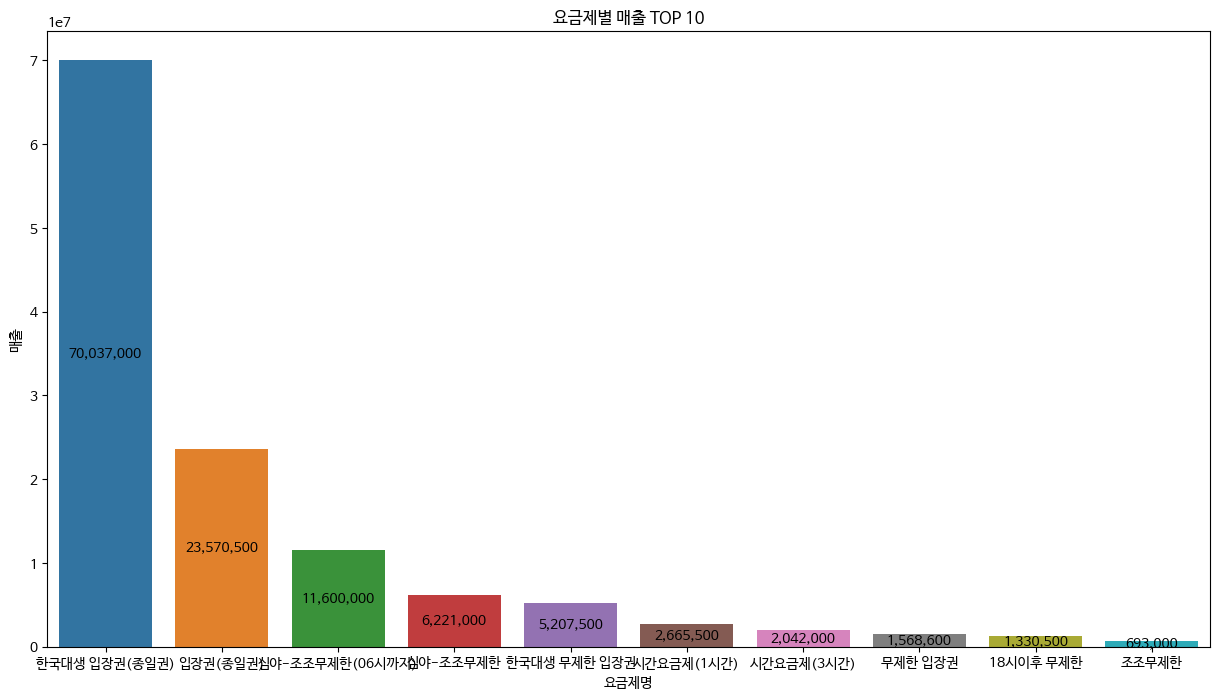

In [40]:
# 집계 결과 시각화하기
# [[YOUR CODE]]
plt.figure(figsize = (15,8))
ax = sns.barplot(data=tickets.head(10), x='요금제명', y='매출')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('요금제별 매출 TOP 10')
plt.show()

In [29]:
# 문제 4: 월별 입장권 매출액 추세
#활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data

# temp_var의 date열을 만들고, entry_data의 입실 중 앞에서 7번째 값까지 할당
temp_var['date'] = entry_data['입실'].str[:7]

# '금액' 칼럼 값이 '0'인 데이터를 제외하고, entry_data의 금액열을 date 기준으로 집계하기
temp_var = temp_var[temp_var['금액'] != 0]
tickets_payment_data = temp_var['금액'].groupby(temp_var['date']).sum()
tickets_payment_data

date
2021-02      292800
2021-03     9831500
2021-04    16440000
2021-05    15073500
2021-06    15856500
2021-07     4783000
2021-08     3837000
2021-09     3815000
2021-10     9202500
2021-11    15157000
2021-12    13093000
2022-01     4815500
2022-02     4024500
2022-03     8821000
2022-04      330600
Name: 금액, dtype: int64

In [30]:
# 이상치 제거하기
tickets_payment_data = tickets_payment_data.drop(['2021-02', '2022-04'])
tickets_payment_data



date
2021-03     9831500
2021-04    16440000
2021-05    15073500
2021-06    15856500
2021-07     4783000
2021-08     3837000
2021-09     3815000
2021-10     9202500
2021-11    15157000
2021-12    13093000
2022-01     4815500
2022-02     4024500
2022-03     8821000
Name: 금액, dtype: int64

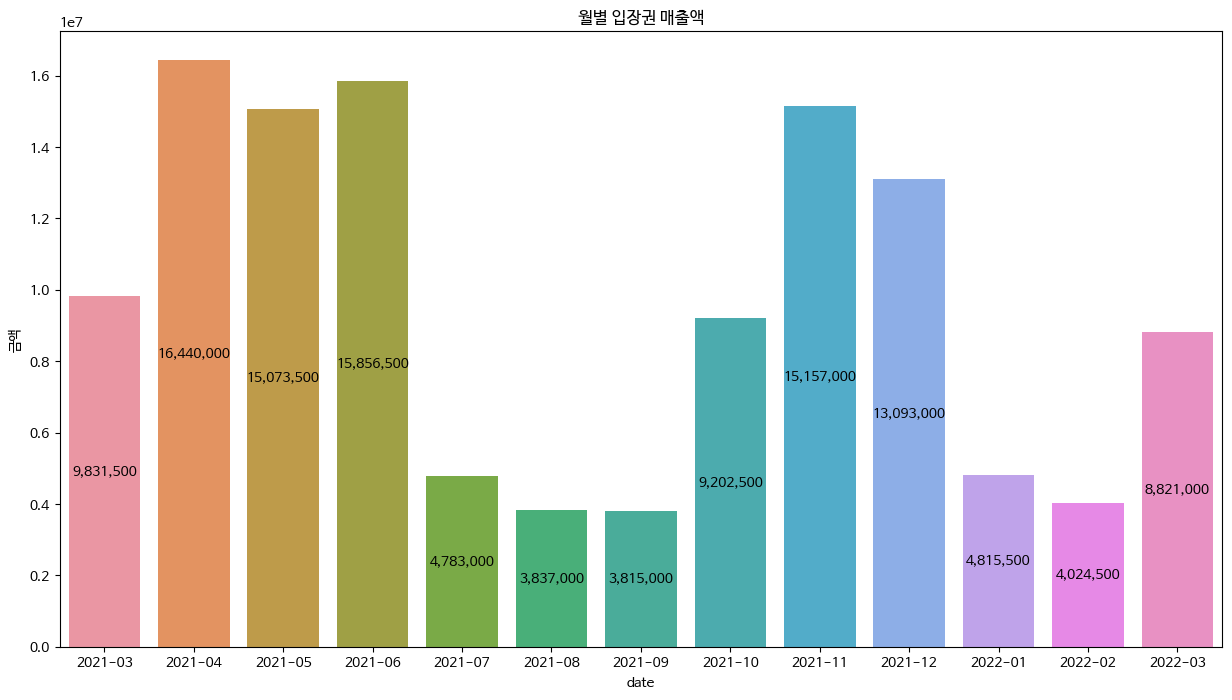

In [41]:
# 집계 결과를 시각화하기
# barplot은 데이터 프레임으로만 만들 수 있다. 시리즈는 불가능하다.

tickets_payment_data = tickets_payment_data.reset_index().copy()
tickets_payment_data
plt.figure(figsize = (15,8))
ax = sns.barplot(data=tickets_payment_data, x= 'date' , y= '금액')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('월별 입장권 매출액')
plt.show()

In [32]:
tickets_payment_data

,date,금액
0,2021-03,9831500
1,2021-04,16440000
2,2021-05,15073500
3,2021-06,15856500
4,2021-07,4783000
5,2021-08,3837000
6,2021-09,3815000
7,2021-10,9202500
8,2021-11,15157000
9,2021-12,13093000


In [33]:

payment_data

,date,결제금액
0,2021-02,7000
1,2021-03,2104500
2,2021-04,3116600
3,2021-05,2537000
4,2021-06,3621500
5,2021-07,1215000
6,2021-08,1229000
7,2021-09,1197500
8,2021-10,2138500
9,2021-11,2748500


In [51]:
#squeeze() 를 통해 시리즈로 만들어 barplot 만들기
payment_data = payment_data.set_index('date')['결제금액'].squeeze()
tickets_payment_data = tickets_payment_data.set_index('date')['금액'].squeeze()

In [47]:
payment_data=payment_data.drop(['2021-02','2022-04']) #민주님과 다르게 나는 이상치를 제거하지 않았었기에, 행 수를 맞추기 위해 제거해줬다.

In [48]:
payment_data

date
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
Name: 결제금액, dtype: int64

In [52]:
tickets_payment_data

date
2021-03     9831500
2021-04    16440000
2021-05    15073500
2021-06    15856500
2021-07     4783000
2021-08     3837000
2021-09     3815000
2021-10     9202500
2021-11    15157000
2021-12    13093000
2022-01     4815500
2022-02     4024500
2022-03     8821000
Name: 금액, dtype: int64

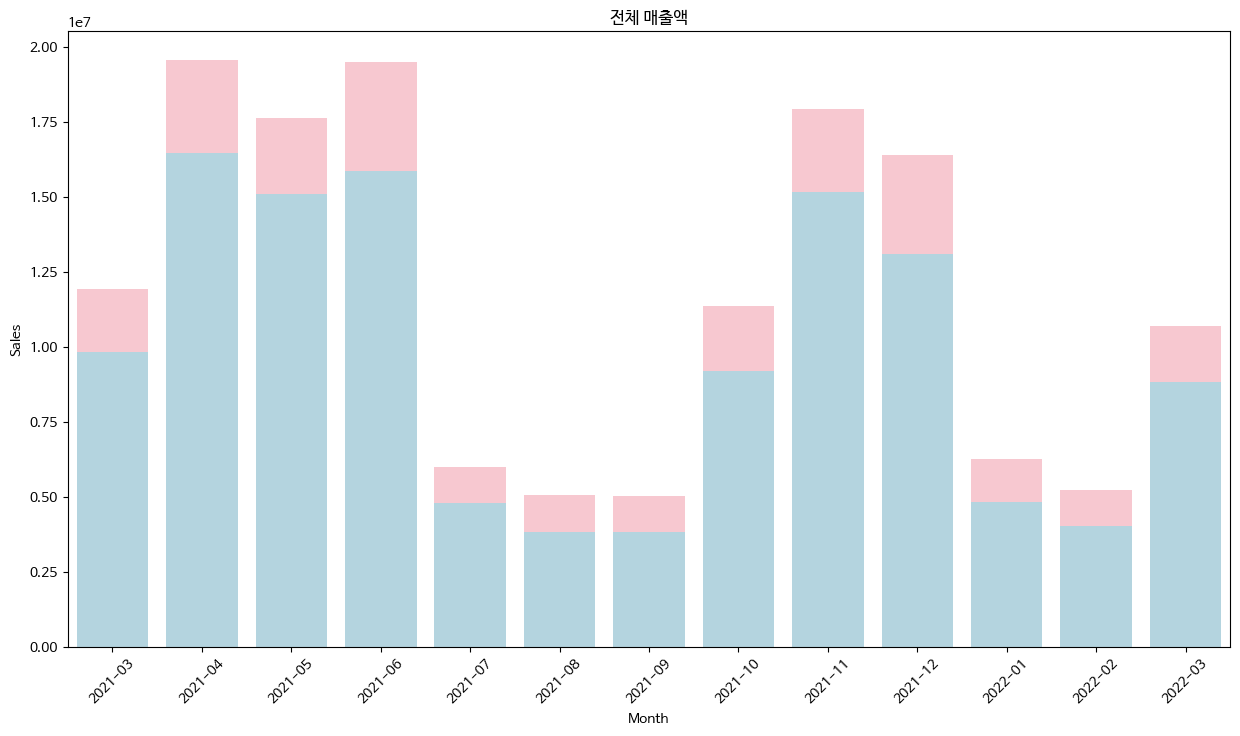

In [53]:
#월별 입장권과 상품 매출 합치기 (누적 막대 그래프 )

plt.figure(figsize=(15,8))

sns.barplot(x=tickets_payment_data.index, y=tickets_payment_data, color='lightblue')
sns.barplot(x=payment_data.index, y=payment_data, color='pink', bottom=tickets_payment_data)

plt.title('전체 매출액')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Sales')

plt.show()


In [54]:
#중복 없는 고객 수
print(len(entry_data['고객'].unique()))
print(len(sales_data['고객'].unique()))

5404
1973


In [55]:
#RFM 방식으로 고객 분류하기
#entry, sales merge - 입장권을 구매하고 음식까지 주문한 고객들만.
es_merged_data =  pd.merge(entry_data, sales_data, on= '고객')
#입장권, 상품 결제 금액 합친 열 : '총금액'
es_merged_data['총금액']=es_merged_data['결제금액']+es_merged_data['금액']
es_merged_data['Now']=('2023-03-20')
es_merged_data['Now']=pd.to_datetime(es_merged_data['Now'])
es_merged_data['입실날짜']=pd.to_datetime(es_merged_data['입실'])
es_merged_data['Interval'] = es_merged_data['Now'] - es_merged_data['입실날짜']
#중복치 제거
es_merged_data=es_merged_data.drop_duplicates(subset=['입실', '금액'])
es_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10064 entries, 0 to 66831
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   요금제명      9971 non-null   object         
 1   입실        10064 non-null  object         
 2   퇴실        10064 non-null  object         
 3   이용        10050 non-null  object         
 4   위치        10064 non-null  object         
 5   금액        10064 non-null  int64          
 6   구분        10064 non-null  object         
 7   고객        10064 non-null  object         
 8   date_x    10064 non-null  object         
 9   결제일시      10064 non-null  object         
 10  판매위치      10064 non-null  object         
 11  상품명       10064 non-null  object         
 12  결제방식      10064 non-null  object         
 13  비고        10064 non-null  object         
 14  판매수량      10064 non-null  int64          
 15  결제금액      10064 non-null  int64          
 16  date_y    10064 non-null  object        

In [56]:
RFM_data = es_merged_data.groupby(es_merged_data['고객']).agg({'Interval':'min', '고객':'count', '총금액':'sum'})
RFM_data.columns = ['Recency', 'Frequency', 'Monetary']
RFM_data

,Recency,Frequency,Monetary
고객,,,
customer200167,425 days 13:27:00,1,7000
customer200188,498 days 04:05:00,4,39000
customer200285,383 days 04:34:00,15,161500
customer200477,460 days 06:34:00,4,44000
customer200759,464 days 04:53:00,7,75500
...,...,...,...
customer999383,642 days 13:03:00,5,60000
customer999420,407 days 07:14:00,2,22500
customer999474,468 days 05:52:00,16,184500


In [57]:
RFM_data['Recency'] = RFM_data['Recency'].dt.days
RFM_data

,Recency,Frequency,Monetary
고객,,,
customer200167,425,1,7000
customer200188,498,4,39000
customer200285,383,15,161500
customer200477,460,4,44000
customer200759,464,7,75500
...,...,...,...
customer999383,642,5,60000
customer999420,407,2,22500
customer999474,468,16,184500


In [58]:
RFM_data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Recency,1803.0,515.66,108.02,352.0,442.0,485.0,622.0,760.0
Frequency,1803.0,5.58,8.85,1.0,2.0,3.0,7.0,150.0
Monetary,1803.0,56761.01,71314.75,4500.0,17000.0,34000.0,71000.0,1162500.0


In [59]:
RFM_data['R_score'] = np.interp(RFM_data['Recency'], (RFM_data['Recency'].min(), RFM_data['Recency'].max()), (100, 1)).round(2)
RFM_data['F_score'] = np.interp(RFM_data['Frequency'], (RFM_data['Frequency'].min(), RFM_data['Frequency'].max()), (1, 100)).round(2)
RFM_data['M_score'] = np.interp(RFM_data['Monetary'], (RFM_data['Monetary'].min(), RFM_data['Monetary'].max()), (1, 100)).round(2)
RFM_data["RFM_score"] = ((RFM_data['R_score'] + RFM_data['F_score'] + RFM_data['M_score'])/3).round(2)
RFM_data["Class"] = pd.qcut(RFM_data['RFM_score'], q=[0, 0.4, 0.65, 0.85, 0.99, 1], labels=[5,4,3,2,1])
RFM_data = RFM_data.reset_index()

RFM_data.head(20)

,고객,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Class
0,customer200167,425,1,7000,82.29,1.00,1.21,28.17,3
1,customer200188,498,4,39000,64.57,2.99,3.95,23.84,4
2,customer200285,383,15,161500,92.48,10.30,14.42,39.07,2
3,customer200477,460,4,44000,73.79,2.99,4.38,27.05,4
4,customer200759,464,7,75500,72.82,4.99,7.07,28.29,3
5,customer201274,461,4,41000,73.55,2.99,4.12,26.89,4
6,customer201282,548,3,26500,52.44,2.33,2.88,19.22,5
7,customer202584,498,2,25500,64.57,1.66,2.80,23.01,4
8,customer202794,471,3,32500,71.12,2.33,3.39,25.61,4
9,customer203019,484,12,117500,67.97,8.31,10.66,28.98,3


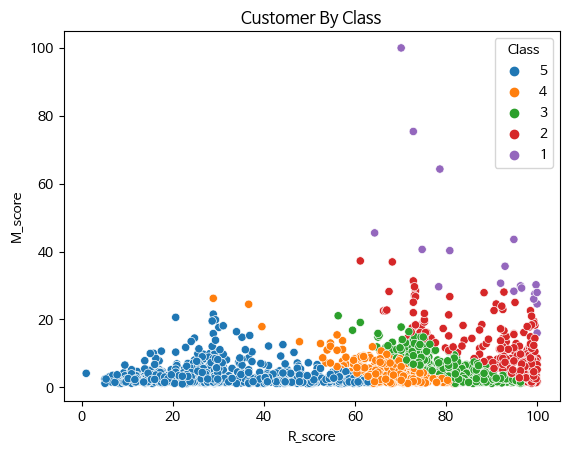

In [60]:
sns.scatterplot(data=RFM_data, x='R_score', y='M_score', hue='Class')
plt.title('Customer By Class')
plt.show()

In [61]:
temp_var = RFM_data['고객'].groupby(RFM_data['Class']).count()
temp_var

Class
5    721
4    452
3    360
2    251
1     19
Name: 고객, dtype: int64

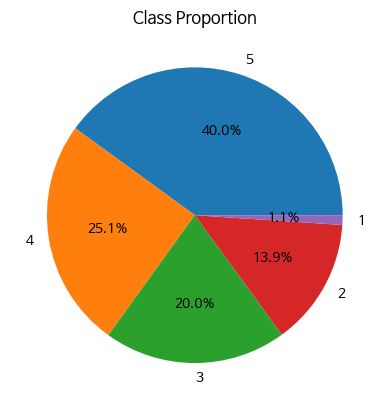

In [62]:
plt.pie(temp_var, labels=temp_var.index, autopct = '%1.1f%%')
plt.title('Class Proportion')
plt.show()

In [63]:
temp_var = RFM_data.groupby('Class').agg({'Recency': 'mean', 'Frequency':'mean', 'Monetary':'mean'}).round(1)
temp_var

,Recency,Frequency,Monetary
Class,,,
5,629.3,3.1,33097.6
4,479.5,4.0,41378.3
3,431.7,6.3,66780.6
2,383.7,10.2,108170.5
1,398.4,61.2,451678.9


In [64]:
temp_var.index = temp_var.index.tolist()
temp_var

,Recency,Frequency,Monetary
5,629.3,3.1,33097.6
4,479.5,4.0,41378.3
3,431.7,6.3,66780.6
2,383.7,10.2,108170.5
1,398.4,61.2,451678.9


In [65]:
temp_var = temp_var.reset_index()
temp_var = temp_var.rename(columns = {'index':'Class'})
temp_var

,Class,Recency,Frequency,Monetary
0,5,629.3,3.1,33097.6
1,4,479.5,4.0,41378.3
2,3,431.7,6.3,66780.6
3,2,383.7,10.2,108170.5
4,1,398.4,61.2,451678.9


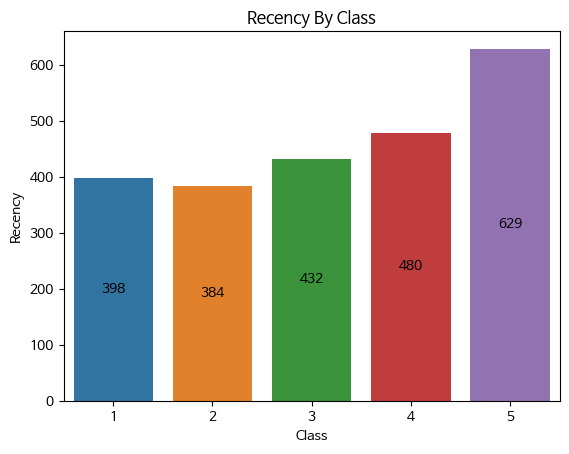

In [66]:
ax = sns.barplot(data=temp_var, x='Class', y='Recency')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Recency By Class')
plt.show()

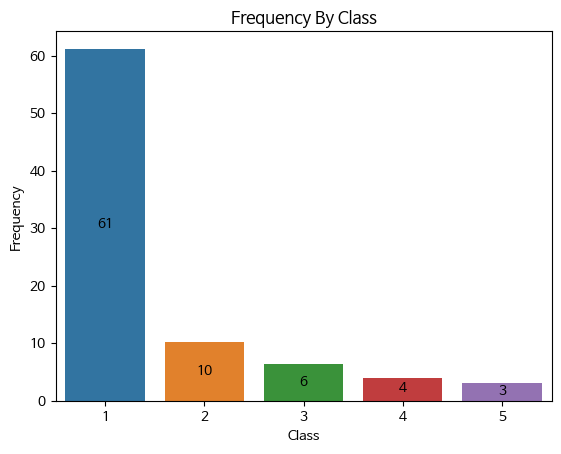

In [67]:
ax = sns.barplot(data=temp_var, x='Class', y='Frequency')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Frequency By Class')
plt.show()

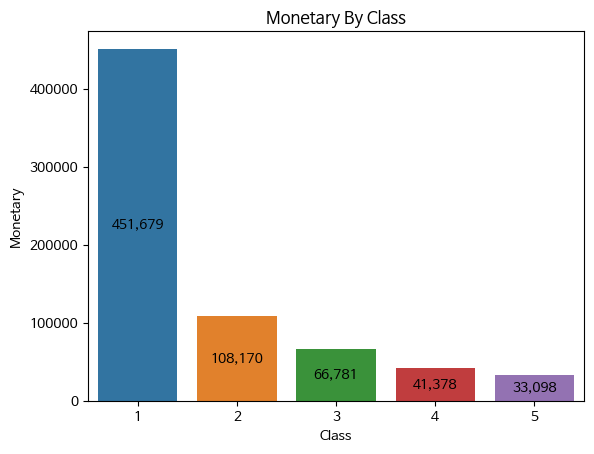

In [68]:
ax = sns.barplot(data=temp_var, x='Class', y='Monetary')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Monetary By Class')
plt.show()

In [69]:
VIP_customer = RFM_data[RFM_data['Class']== 1]


VIP_customer

,고객,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Class
70,customer229550,441,97,339500,78.40,64.79,29.64,57.61,1
114,customer241622,385,34,351500,91.99,22.93,30.67,48.53,1
119,customer243082,381,35,410000,92.96,23.59,35.67,50.74,1
161,customer258946,440,138,745000,78.65,92.03,64.31,78.33,1
308,customer300766,352,90,180000,100.00,60.13,16.00,58.71,1
354,customer319091,373,29,324000,94.90,19.60,28.31,47.60,1
417,customer338849,475,142,1162500,70.15,94.68,100.00,88.28,1
645,customer440840,499,150,525000,64.33,100.00,45.50,69.94,1
778,customer488580,456,41,468000,74.76,27.58,40.63,47.66,1
986,customer581973,373,67,502500,94.90,44.85,43.58,61.11,1


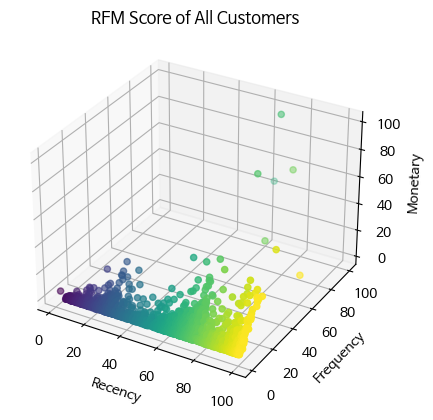

In [70]:
# 필요한 라이브러리를 호출합니다. 
from mpl_toolkits.mplot3d import Axes3D

# 시각화를 위해 필요한 Figure와 ax를 정의합니다. 
fig=plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# x축, y축, z축에 각 데이터를 할당합니다. 
x = RFM_data['R_score']
y = RFM_data['F_score']
z = RFM_data['M_score']

# x축, y축, z축에 각 레이블을 부여합니다. . 
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# 산포도 형태의 3차원 시각화를 수행합니다. 
# 이때 색깔은 x축을 기준으로 합니다. 
ax = ax.scatter(x,y,z, c=x)

plt.title('RFM Score of All Customers')
plt.show()